
# Analysis Process Using Python

In [1]:
# Importing used libraries for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

In [2]:
# Importing the combined df_cyc table
df_cyc = pd.read_csv("D:\Courses\Data Analysis\Projects\Cyclistics\DATA\cleaned\cleaned_data.csv")
df_cyc.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length_min
0,9DC7B962304CBFD8 ...,electric_bike ...,2021-09-28 16:07:10.0000000,2021-09-28 16:09:54.0000000,casual ...,Tuesday,2
1,F930E2C6872D6B32 ...,electric_bike ...,2021-09-28 14:24:51.0000000,2021-09-28 14:40:05.0000000,casual ...,Tuesday,16
2,6EF72137900BB910 ...,electric_bike ...,2021-09-28 00:20:16.0000000,2021-09-28 00:23:57.0000000,casual ...,Tuesday,3
3,78D1DE133B3DBF55 ...,electric_bike ...,2021-09-28 14:51:17.0000000,2021-09-28 15:00:06.0000000,casual ...,Tuesday,9
4,E03D4ACDCAEF6E00 ...,electric_bike ...,2021-09-28 09:53:12.0000000,2021-09-28 10:03:44.0000000,casual ...,Tuesday,10


In [3]:
# Coverting df_cyctypes of each columns.
df_cyc = df_cyc.astype({'ride_id':'string', 'rideable_type':'category','started_at': 'datetime64','ended_at': 'datetime64', 'member_casual':'category','day_of_week':'category'})
df_cyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729917 entries, 0 to 5729916
Data columns (total 7 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ride_id          string        
 1   rideable_type    category      
 2   started_at       datetime64[ns]
 3   ended_at         datetime64[ns]
 4   member_casual    category      
 5   day_of_week      category      
 6   ride_length_min  int64         
dtypes: category(3), datetime64[ns](2), int64(1), string(1)
memory usage: 191.3 MB


In [4]:
# Trim whitespace in member_casual & rideable_type columns
df_cyc['member_casual'] = df_cyc['member_casual'].str.replace(' ', '')
df_cyc['rideable_type'] = df_cyc['rideable_type'].str.replace(' ', '')
df_cyc[['day_of_week','rideable_type']].nunique()

day_of_week      7
rideable_type    3
dtype: int64

In [5]:
# Adding year, months & hours columns
df_cyc['year'] = df_cyc['started_at'].dt.year
df_cyc['hour'] = df_cyc['started_at'].dt.hour
df_cyc['month'] = df_cyc['started_at'].dt.month_name()
df_cyc['month_year'] = df_cyc['started_at'].dt.to_period('M')

df_cyc.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length_min,year,hour,month,month_year
0,9DC7B962304CBFD8 ...,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,casual,Tuesday,2,2021,16,September,2021-09
1,F930E2C6872D6B32 ...,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,casual,Tuesday,16,2021,14,September,2021-09
2,6EF72137900BB910 ...,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,casual,Tuesday,3,2021,0,September,2021-09
3,78D1DE133B3DBF55 ...,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,casual,Tuesday,9,2021,14,September,2021-09
4,E03D4ACDCAEF6E00 ...,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,casual,Tuesday,10,2021,9,September,2021-09


In [6]:
# convert month to category
df_cyc = df_cyc.astype({'month':'category'})
df_cyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729917 entries, 0 to 5729916
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ride_id          string        
 1   rideable_type    object        
 2   started_at       datetime64[ns]
 3   ended_at         datetime64[ns]
 4   member_casual    object        
 5   day_of_week      category      
 6   ride_length_min  int64         
 7   year             int64         
 8   hour             int64         
 9   month            category      
 10  month_year       period[M]     
dtypes: category(2), datetime64[ns](2), int64(3), object(2), period[M](1), string(1)
memory usage: 404.4+ MB


In [7]:
# no. of rows & columns
df_cyc.shape

(5729917, 11)

#### Check for unique values

In [8]:
# Check for unique values
df_cyc.nunique()

ride_id            5729917
rideable_type            3
started_at         4804264
ended_at           4811401
member_casual            2
day_of_week              7
ride_length_min       2692
year                     2
hour                    24
month                   12
month_year              12
dtype: int64

### Ride Length Analysis

In [9]:
df_cyc.groupby(['member_casual'])['ride_length_min'].describe()

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2411813.0,29.974405,248.107162,2.0,8.0,14.0,26.0,40705.0
member,3318104.0,13.212273,28.012177,2.0,5.0,9.0,16.0,1560.0


- The longest journey for a casual rider was **678.5 hours**, whereas the longest trip for a member rider was **26 hours**. Both of these figures are quite high. Such journeys should be categorised as outliers. To decrease outlier bias, I decided to **Delete** the highest quantile of data (the top 25% percentile).

In [10]:
cont = df_cyc[(df_cyc['ride_length_min'] > 16.0) & (df_cyc['member_casual'] == 'member')].index 
df_cyc.drop(cont, inplace= True)
cont = df_cyc[(df_cyc['ride_length_min'] > 26.0) & (df_cyc['member_casual'] == 'casual')].index 
df_cyc.drop(cont, inplace= True)
df_cyc

,ride_id,rideable_type,started_at,ended_at,member_casual,day_of_week,ride_length_min,year,hour,month,month_year
0,9DC7B962304CBFD8 ...,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,casual,Tuesday,2,2021,16,September,2021-09
1,F930E2C6872D6B32 ...,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,casual,Tuesday,16,2021,14,September,2021-09
2,6EF72137900BB910 ...,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,casual,Tuesday,3,2021,0,September,2021-09
3,78D1DE133B3DBF55 ...,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,casual,Tuesday,9,2021,14,September,2021-09
4,E03D4ACDCAEF6E00 ...,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,casual,Tuesday,10,2021,9,September,2021-09
...,...,...,...,...,...,...,...,...,...,...,...
5729912,F0D07546CE23143B,classic_bike,2022-08-29 16:19:45,2022-08-29 16:26:23,casual,Monday,7,2022,16,August,2022-08
5729913,789C902A541A166D,electric_bike,2022-08-28 21:04:13,2022-08-28 21:11:12,casual,Sunday,7,2022,21,August,2022-08
5729914,AE1B3ED524B1B1DA,electric_bike,2022-08-29 06:49:14,2022-08-29 06:54:18,casual,Monday,5,2022,6,August,2022-08
5729915,CEA27B213FC4E80F,electric_bike,2022-08-27 16:09:12,2022-08-27 16:18:51,member,Saturday,9,2022,16,August,2022-08


Text(0.0, 1.0, 'Member and Casual Riders Distribution')

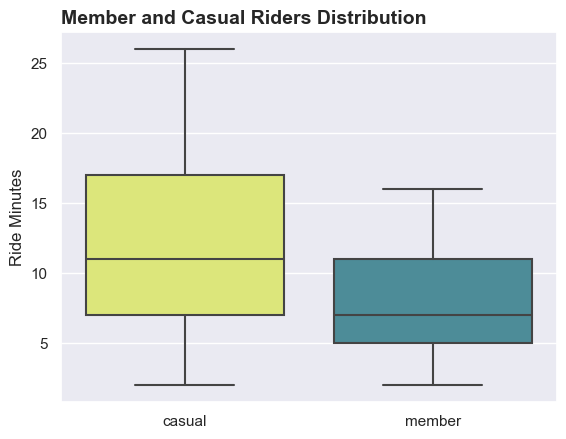

In [15]:
palette = {"casual":"#EBF869","member":"#4095A4"}
sns.boxplot(data=df_cyc, x='member_casual', y='ride_length_min', palette=palette)
plt.xlabel("")
plt.ylabel("Ride Minutes")
plt.title("Member and Casual Riders Distribution",fontweight ='bold', fontsize = 14, loc='left')

- Since the mean & the median values are **Near**, and the std is dramaticaly **Lowered** therefore this is expected to lead to more logical analysis 

C:\Users\Ziadz\AppData\Local\Temp\ipykernel_3112\3393879423.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])


Text(0.0, 1.0, 'Total Ride Minutes')

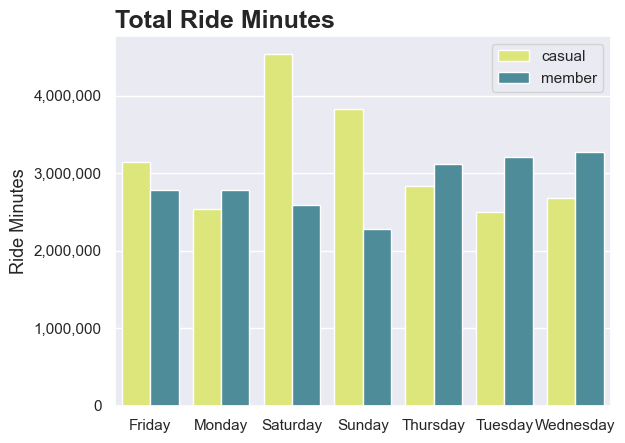

In [48]:
ax = df_cyc.groupby(['member_casual','day_of_week']).agg(ride_length=('ride_length_min','sum'))
ax = ax.reset_index()
palette = {"casual":"#EBF869",
           "member":"#4095A4"}

sns.barplot(x="day_of_week",
           y="ride_length",
           hue="member_casual",
           palette=palette,
           data=ax)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("")
plt.ylabel('Ride Minutes',fontsize=13)
plt.title("Total Ride Minutes",fontweight ='bold', fontsize = 18, loc='left')


- The ride minutes in weekends for casual riders is nearly **Double** the number compared to member riders

- the member riders are more **Consistent** through the day its more likely that the reason is, member riders uses their bikes for going to work. which explains why they are less active at the weekends

### Number of Rides Analysis

C:\Users\Ziadz\AppData\Local\Temp\ipykernel_3112\2291986536.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])


Text(0.0, 1.0, 'Rides by bike type')

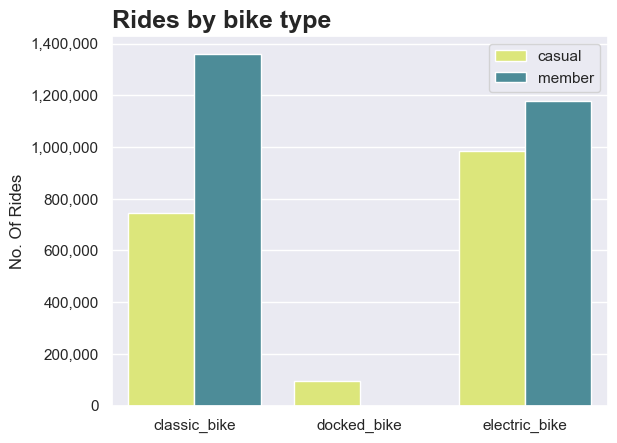

In [25]:
ax1 = df_cyc.groupby(['member_casual','rideable_type']).agg(ride_count=('ride_id','count'))
ax1 = ax1.reset_index()

sns.barplot(x="rideable_type",
           y="ride_count",
           hue="member_casual",
           palette=palette,
           data=ax1)
           
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("")
plt.ylabel("No. Of Rides")
plt.title("Rides by bike type",fontweight ='bold', fontsize = 18, loc='left')



- Member riders made nearly **Double** the no. of rides with classic bikes compared to casual riders

- member riders didn't record any docked bike rides

C:\Users\Ziadz\AppData\Local\Temp\ipykernel_3112\2320099754.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])


Text(0.0, 1.0, 'Total Number of Riders')

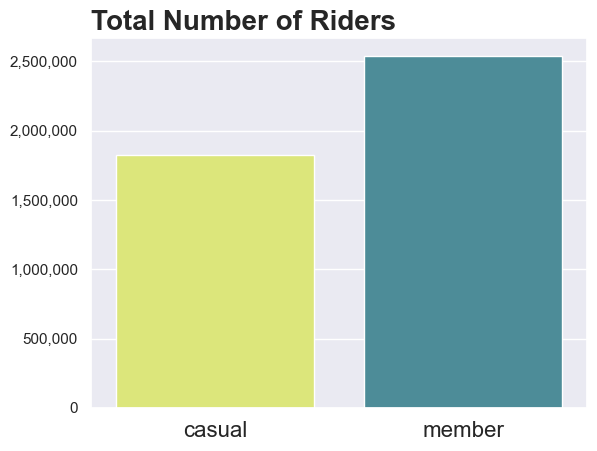

In [30]:
sns.countplot(data=df_cyc, x='member_casual', palette=palette)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.ylabel("")
plt.xlabel("")
plt.xticks(fontsize=16)
plt.title("Total Number of Riders", fontsize=20, fontweight='bold', loc='left')

C:\Users\Ziadz\AppData\Local\Temp\ipykernel_3112\574241394.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])


Text(0.0, 1.0, 'Riders Activity During the Week')

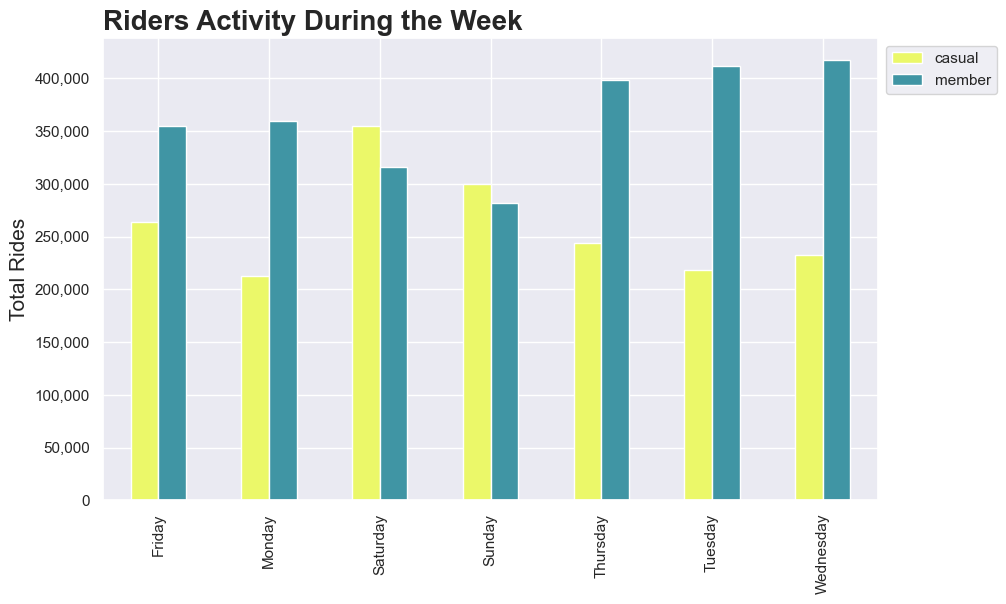

In [36]:
ax = df_cyc.groupby(['member_casual','day_of_week'])['ride_id'].count().unstack(0)
ax.plot.bar(figsize=(10,6), color= palette)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("")
plt.ylabel('Total Rides',fontsize=15)
plt.title("Riders Activity During the Week",fontweight ='bold', fontsize = 20, loc='left')

 Member riders usually take more rides during the week except on **Weekends**

C:\Users\Ziadz\AppData\Local\Temp\ipykernel_3112\1576451396.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])


Text(0.0, 1.0, 'Total Rides in Month ')

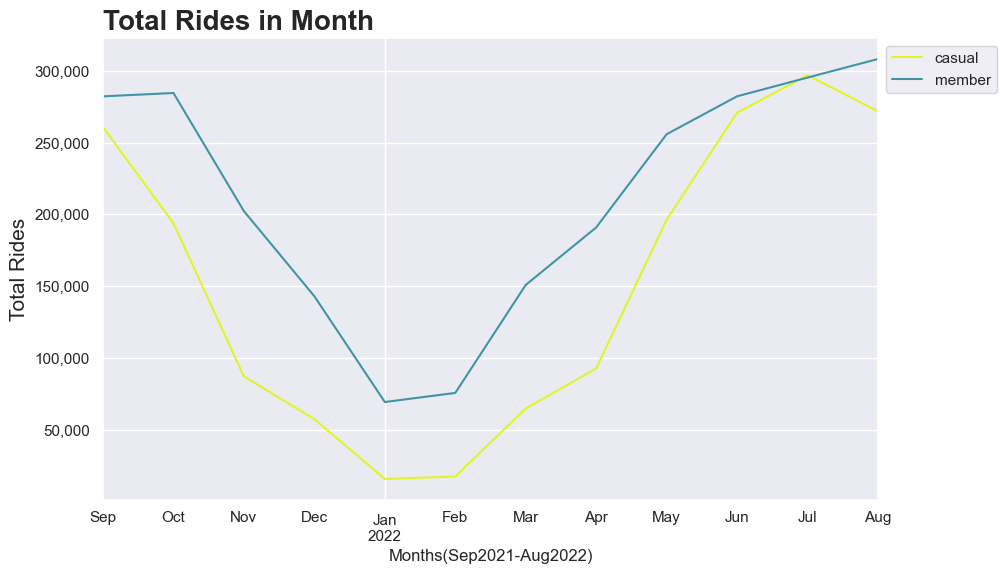

In [42]:
ax = df_cyc.groupby(['member_casual','month_year'])['ride_id'].count().unstack(0)
#sns.countplot(data=df_cyc, x='month_year', hue='member_casual')
ax.plot(figsize=(10,6), color={"#e2f428","#4095A4"})
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Months(Sep2021-Aug2022)")
plt.ylabel('Total Rides',fontsize=15)
plt.title("Total Rides in Month ",fontweight ='bold', fontsize = 20, loc='left')

- It shows that the total number of rides **Decrease** in winter & **Increase** in summer

- Casual & member riders have nearly the **Same** behaviour 

C:\Users\Ziadz\AppData\Local\Temp\ipykernel_3112\365881484.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])


Text(0.0, 1.0, 'Rides per Hour ')

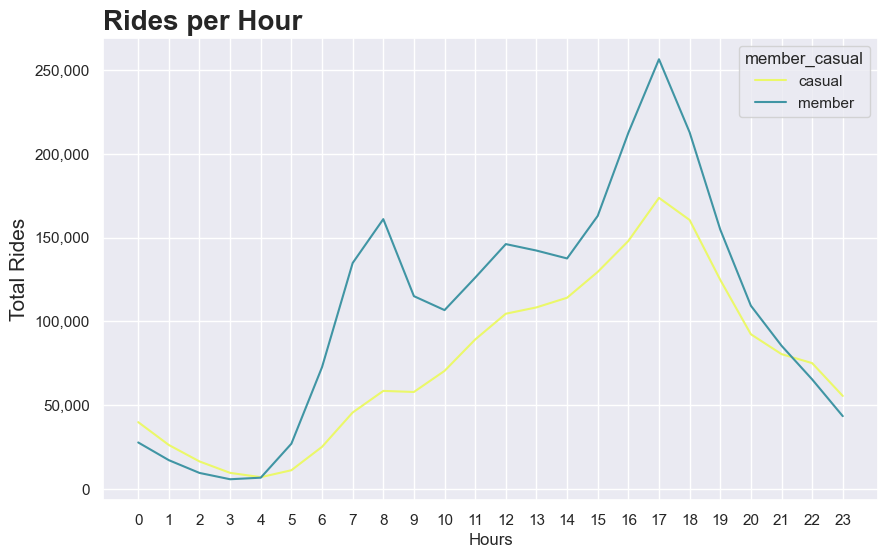

In [43]:
ax = df_cyc.groupby(['member_casual','hour'])['ride_id'].count().unstack(0)
ax.plot(figsize=(10,6), color=palette)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.xticks(np.arange(min(df_cyc['hour']), max(df_cyc['hour'])+1, 1.0))
plt.xlabel("Hours")
plt.ylabel('Total Rides',fontsize=15)
plt.title("Rides per Hour ",fontweight ='bold', fontsize = 20, loc='left')

- it is noticable that most member riders are most likely using their bikes to travel from/to workplace, as the no. of rides increase from 4 a.m to 8 a.m then it start to drop untill 10 a.m. on the other side, casual members no. of rides didn't decrease from 8 a.m and it increased from 9 a.m to 5 p.m

- the sudden increase from 2 p.m to 5 p.m reinforces my claims about using the bike for travelling from/to workplace when it comes to member Riders  

### Conclusion

- Casual Riders Make **Less Rides** Than Members but, Spend **More Riding Minutes**

- The Ride Minutes in Weekends for Casual Riders is Nearly **Double** the Number Compared to Member Riders

- the Member Riders are more Likely Using their Bikes for **Travelling to/from Workplace** on a Daily Basis

- Docked bike type is **not a preffered option** for the Riders 

- the Riders tend to Take More Rides in **Spring & Summer**